# Logistic regression for classification

Basic intuition: Tries to fit in a S=curve into the data.  
The output of the model is a probability  
Cross Entropy: It is a cost function. It measure how well the estimated probabilities match actual labels  
Low Cross entropy: the proability of y-actual and y-predicted are in sync.  
High Cross entropy: the y-actual and y-predicted are not in sync.  
The objectives is to minimize the cross entropy.  
Evaluation technique of the model:
1. Accuracy: 
2. Precision
3. Recall

Accuracy : more matches = higher accuracy  .
Accuracy may not always be good. High accuracy does not always mean the model is good. For example, when dataset is skewed(when some labels are much more common or rare)  

Confusion matrix: predicted labels vs actual labels  

Precision : accuracy when classifer flags True TP/(TP+FP)  

Recall : Accuracy of the model when the actual values are True TP/(TP + FN)

A model can have very high accuracy but low precision and recall

Threshold : This is the boundary that is used to classify a model

ROC Curve : TP rate vs FP rate curve. (It is used to find the threshold that is good for our model that maximizes TP rate and minimizes FP rate). We plot the TP rate and FP rate for every threshold in our model. This curve is called ROC (Receiver Operating Curve) We should choose the top left corner of the curve. This is used for choosing the tradeoff between precision and recall

In [66]:
import pandas as pd

In [67]:
titanic_df = pd.read_csv("./datasets/titanic_train.csv")

In [68]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
titanic_df.drop(['PassengerId','Name','Ticket','Cabin'],'columns',inplace=True)

In [70]:
titanic_df.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q


In [71]:
titanic_df[titanic_df.isnull().any(axis=1)].count()

Survived    179
Pclass      179
Sex         179
Age           2
SibSp       179
Parch       179
Fare        179
Embarked    177
dtype: int64

In [72]:
titanic_df = titanic_df.dropna()

In [73]:
titanic_df.shape

(712, 8)

In [74]:
titanic_df[titanic_df.isnull().any(axis=1)].count()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [75]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Text(0,0.5,'survived')

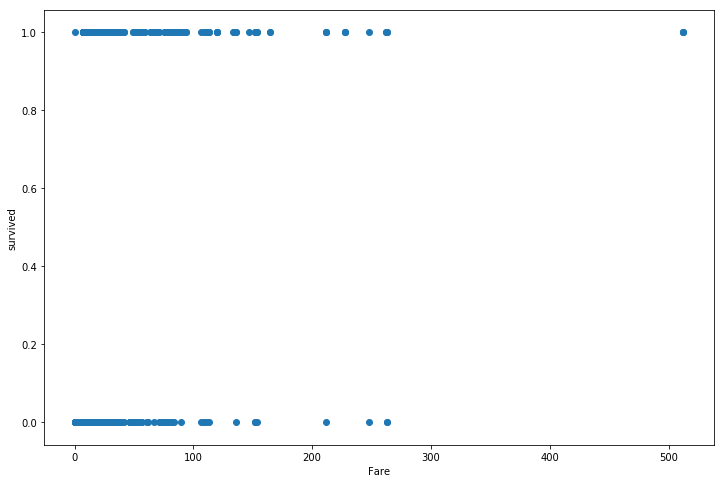

In [76]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(12,8))
plt.scatter(titanic_df['Fare'],titanic_df["Survived"])
plt.xlabel("Fare")
plt.ylabel("survived")

In [77]:
pd.crosstab(titanic_df["Sex"],titanic_df["Survived"])

Survived,0,1
Sex,,
female,64,195
male,360,93


In [78]:
pd.crosstab(titanic_df["Pclass"],titanic_df["Survived"])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


In [79]:
titanic_data_corr = titanic_df.corr()
titanic_data_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


In [80]:
import seaborn as sns

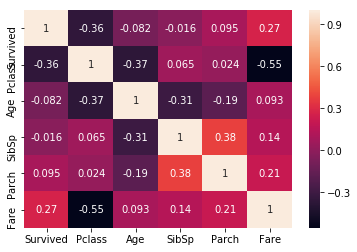

In [81]:
sns.heatmap(titanic_data_corr,annot=True)

## Data Preprocessing

In [82]:
from sklearn import preprocessing

In [83]:
label_encoding = preprocessing.LabelEncoder()
titanic_df["Sex"] = label_encoding.fit_transform(titanic_df['Sex'].astype(str))

In [84]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [85]:
label_encoding.classes_

array(['female', 'male'], dtype=object)

In [86]:
titanic_df = pd.get_dummies(titanic_df, columns=["Embarked"])
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [93]:
titanic_df = titanic_df.sample(frac=1).reset_index(drop=True)
titanic_df.head()
#shuffles and remove original indices

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,1,1,47.0,0,0,25.5875,0,0,1
1,0,3,1,32.0,0,0,7.7500,0,1,0
2,0,1,1,24.0,0,1,247.5208,1,0,0
3,0,1,1,44.0,2,0,90.0000,0,1,0
4,0,1,1,40.0,0,0,27.7208,1,0,0


In [94]:
titanic_df.to_csv("datasets/titanic_processed.csv",index=True)

In [ ]:
from sklearn